# **Final Project 2 (Rain in Australia)**

Group 7 :

1. Ainal Fajri Malahayati (PYTN-KS12-006)
2. Raihan Daffa Aziz (PYTN-KS12-025)
3. Tsaabitah Anggraini (PYTN-KS12-023)

## **About Dataset**

Dataset ini merupakan dataset yang mencatat hasil observasi terhadap cuaca harian yang terjadi di beberapa titik lokasi di Australia selama kurang lebih 10 tahun. Dataset ini terdiri dari 145460 baris dan 23 kolom. Konteks yang terdapat dalam dataset ini ialah memprediksi apakah hari esok akan hujan atau tidak dengan melakukan classification training pada variabel target yaitu RainTomorrow.

## **Import Library**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
%matplotlib inline

from sklearn.model_selection import KFold, cross_val_score
from sklearn.feature_selection import chi2
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, accuracy_score, auc, roc_curve, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

<br>

## **Data Loading**

Pada proses data loading ini, kita akan mencoba membaca dataset dalam bentuk dataframe dengan menggunakan library pandas. Setelah itu akan ditampilkan baris-baris teratas dari dataframe dengan method head().

In [6]:
data = pd.read_csv('dataset/weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
data.shape

(145460, 23)

Berdasarkan hasil diatas, dataset terdiri dari 145460 baris dan 23 kolom.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Selain itu dengan method info() kita dapat melihat atribut apa saja yang terdapat dalam dataset, jumlah nilai null yang terdapat pada masing-masing atribut beserta tipe datanya. Terdapat 7 atribut yang bersifat kategorik dan 16 bertipe numerik. Berdasarkan info diatas, terdapat 21 kolom atribut yang terdapat nilai null, sehingga hal ini perlu diatasi pada tahap cleaning nanti.

In [9]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


Untuk melihat informasi statistik data, kita dapat menggunakan method describe(). Method describe ini akan menghitung informasi statistik dari atribut yang bertipe numerik.

<br>

## **Data Cleaning**

Pada tahap data cleaning, kita akan menangani atribut yang memiliki nilai null tadi. Untuk atribut yang memiliki nilai null yang besar (lebih dari 10%) akan dilakukan drop pada atribut. Sedangkan untuk nilai null yang kecil akan direplace dengan menggunakan beberapa metode yang disesuaikan berdasarkan bentuk distribusi data dari masing-masing atribut terkait.

In [10]:
data.isnull().sum()/len(data)*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

Atribut Evaporation, Sunshine, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm memiliki nilai null yang cukup besar sehingga diputuskan untuk didrop.

In [11]:
data.drop(['Evaporation','Sunshine','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm'], inplace = True, axis = 1)
data

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,15.1,26.0,No,No


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   WindGustDir    135134 non-null  object 
 6   WindGustSpeed  135197 non-null  float64
 7   WindDir9am     134894 non-null  object 
 8   WindDir3pm     141232 non-null  object 
 9   WindSpeed9am   143693 non-null  float64
 10  WindSpeed3pm   142398 non-null  float64
 11  Humidity9am    142806 non-null  float64
 12  Humidity3pm    140953 non-null  float64
 13  Temp9am        143693 non-null  float64
 14  Temp3pm        141851 non-null  float64
 15  RainToday      142199 non-null  object 
 16  RainTomorrow   142193 non-null  object 
dtypes: float64(10), object(7)
mem

In [13]:
data.isnull().sum()/len(data)*100

Date             0.000000
Location         0.000000
MinTemp          1.020899
MaxTemp          0.866905
Rainfall         2.241853
WindGustDir      7.098859
WindGustSpeed    7.055548
WindDir9am       7.263853
WindDir3pm       2.906641
WindSpeed9am     1.214767
WindSpeed3pm     2.105046
Humidity9am      1.824557
Humidity3pm      3.098446
Temp9am          1.214767
Temp3pm          2.481094
RainToday        2.241853
RainTomorrow     2.245978
dtype: float64

Sedangkan untuk atribut yang memiliki nilai null yang kecil, terdapat 2 penanganan, yaitu:
1. Atribut categorical,
untuk atribut ini nilai null akan direplace dengan menggunakan nilai modus dari masing-masing atribut.
2. Atribut numerical,
untuk atribut ini, akan dilihat terlebih dahulu bentuk distribusi datanya. Jika bentuk data right skewed/ left skewed maka nilai null pada atrbiut tersebut akan direplace dengan nilai median dari masing-masing atribut. Namun, jika bentuk data normal, maka nilai null yang terdapat pada atribut tersebut akan didrop.

In [14]:
# untuk data categorical
data['WindGustDir'] = data['WindGustDir'].fillna(data['WindGustDir'].mode()[0])
data['WindDir9am'] = data['WindDir9am'].fillna(data['WindDir9am'].mode()[0])
data['WindDir3pm'] = data['WindDir3pm'].fillna(data['WindDir3pm'].mode()[0])
data['RainToday'] = data['RainToday'].fillna(data['RainToday'].mode()[0])
data['RainTomorrow'] = data['RainTomorrow'].fillna(data['RainTomorrow'].mode()[0])

C:\Users\tsaab\AppData\Local\Temp\ipykernel_26924\461167637.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  MinTemp = sns.distplot(data['MinTemp'], bins=20, kde=True)


<Axes: xlabel='MinTemp', ylabel='Density'>

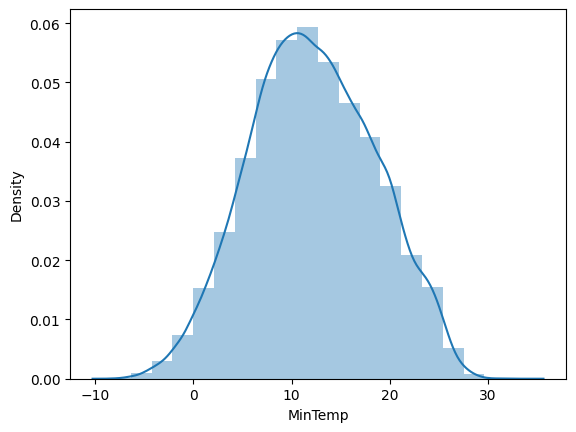

In [15]:
# buat untuk data numerical
# buat distribusi data dulu
# 1. MinTemp
MinTemp = sns.distplot(data['MinTemp'], bins=20, kde=True)
MinTemp

C:\Users\tsaab\AppData\Local\Temp\ipykernel_26924\2139869802.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  MaxTemp = sns.distplot(data['MaxTemp'], bins=20, kde=True)


<Axes: xlabel='MaxTemp', ylabel='Density'>

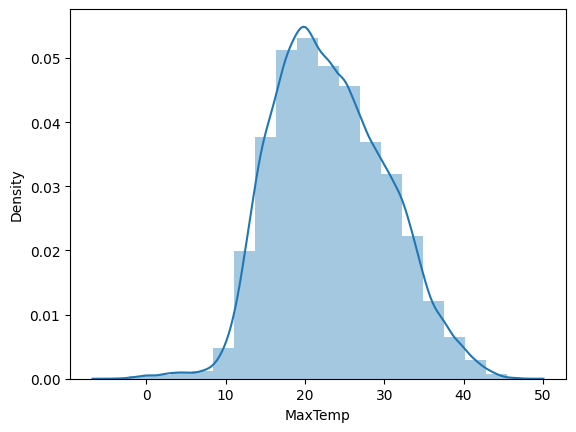

In [16]:
# 2. MaxTemp
MaxTemp = sns.distplot(data['MaxTemp'], bins=20, kde=True)
MaxTemp 

C:\Users\tsaab\AppData\Local\Temp\ipykernel_26924\3946250421.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  Rainfall = sns.distplot(data['Rainfall'], bins=20, kde=True)


<Axes: xlabel='Rainfall', ylabel='Density'>

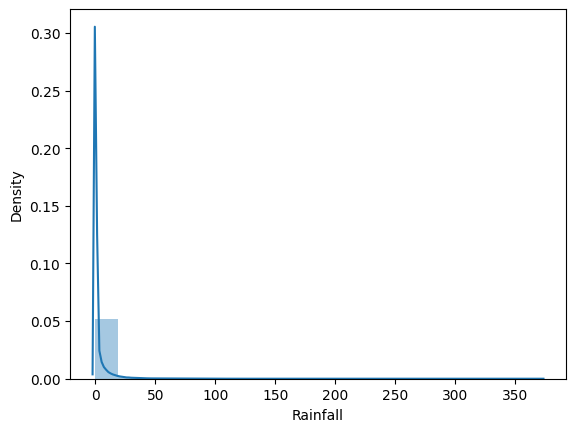

In [17]:
# 3. Rainfall
Rainfall = sns.distplot(data['Rainfall'], bins=20, kde=True)
Rainfall

C:\Users\tsaab\AppData\Local\Temp\ipykernel_26924\1783043290.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  WindGustSpeed = sns.distplot(data['WindGustSpeed'], bins=20, kde=True)


<Axes: xlabel='WindGustSpeed', ylabel='Density'>

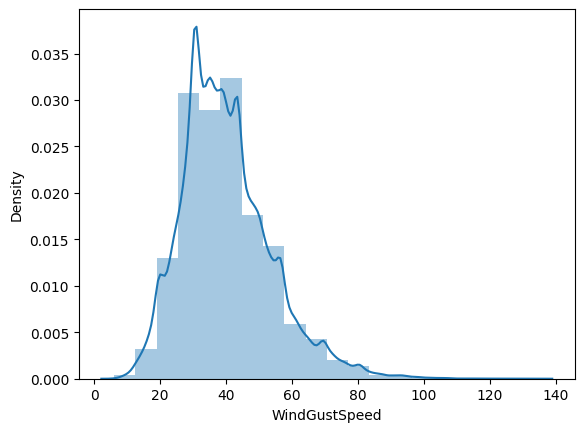

In [18]:
# 4. WindGustSpeed
WindGustSpeed = sns.distplot(data['WindGustSpeed'], bins=20, kde=True)
WindGustSpeed

C:\Users\tsaab\AppData\Local\Temp\ipykernel_26924\624664775.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  WindSpeed9am = sns.distplot(data['WindSpeed9am'], bins=20, kde=True)


<Axes: xlabel='WindSpeed9am', ylabel='Density'>

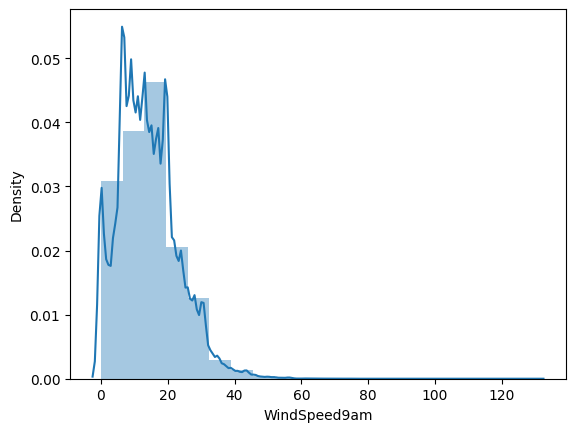

In [19]:
# 5. WindSpeed9am
WindSpeed9am = sns.distplot(data['WindSpeed9am'], bins=20, kde=True)
WindSpeed9am

C:\Users\tsaab\AppData\Local\Temp\ipykernel_26924\775876950.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  WindSpeed3pm = sns.distplot(data['WindSpeed3pm'], bins=20, kde=True)


<Axes: xlabel='WindSpeed3pm', ylabel='Density'>

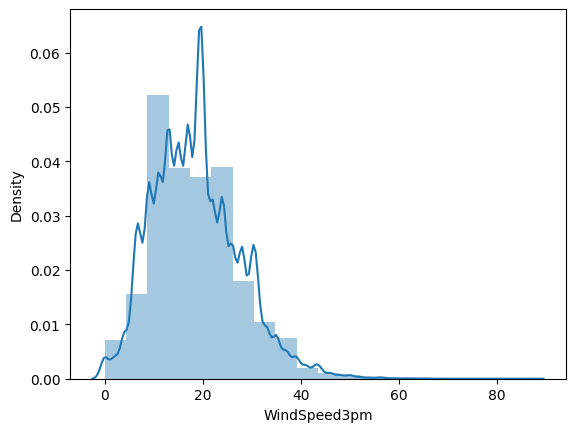

In [20]:
# 6. WindSpeed3pm
WindSpeed3pm = sns.distplot(data['WindSpeed3pm'], bins=20, kde=True)
WindSpeed3pm

C:\Users\tsaab\AppData\Local\Temp\ipykernel_26924\2226722635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  Humidity9am = sns.distplot(data['Humidity9am'], bins=20, kde=True)


<Axes: xlabel='Humidity9am', ylabel='Density'>

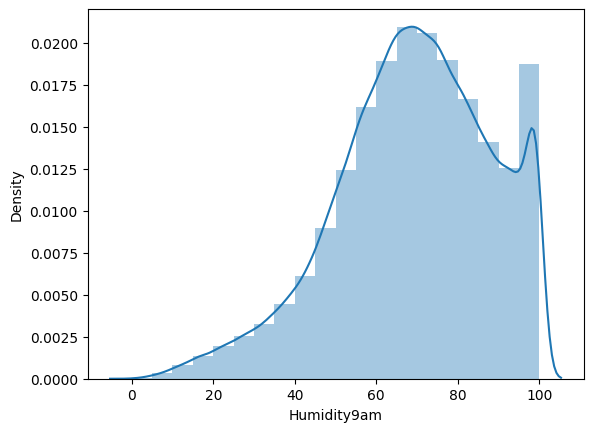

In [21]:
# 7. Humidity9am
Humidity9am = sns.distplot(data['Humidity9am'], bins=20, kde=True)
Humidity9am

C:\Users\tsaab\AppData\Local\Temp\ipykernel_26924\835253071.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  Humidity3pm = sns.distplot(data['Humidity3pm'], bins=20, kde=True)


<Axes: xlabel='Humidity3pm', ylabel='Density'>

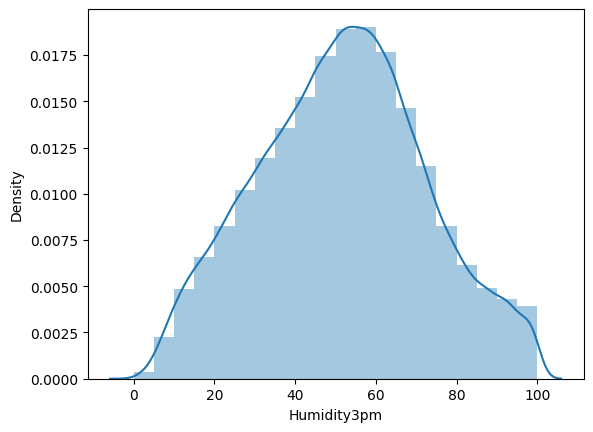

In [22]:
# 8. Humidity3pm
Humidity3pm = sns.distplot(data['Humidity3pm'], bins=20, kde=True)
Humidity3pm

C:\Users\tsaab\AppData\Local\Temp\ipykernel_26924\3874537211.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  Temp9am = sns.distplot(data['Temp9am'], bins=20, kde=True)


<Axes: xlabel='Temp9am', ylabel='Density'>

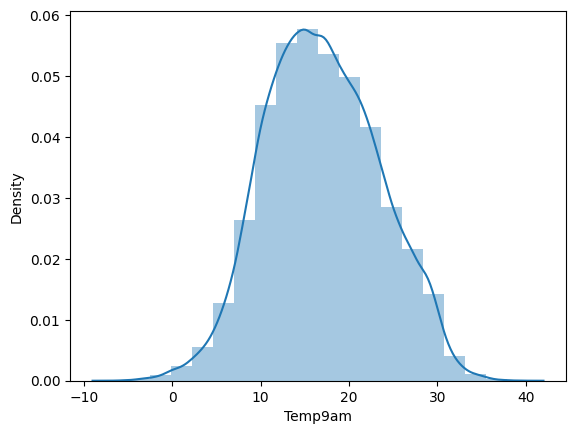

In [23]:
# 9. Temp9am
Temp9am = sns.distplot(data['Temp9am'], bins=20, kde=True)
Temp9am

C:\Users\tsaab\AppData\Local\Temp\ipykernel_26924\2452267022.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  Temp3pm = sns.distplot(data['Temp3pm'], bins=20, kde=True)


<Axes: xlabel='Temp3pm', ylabel='Density'>

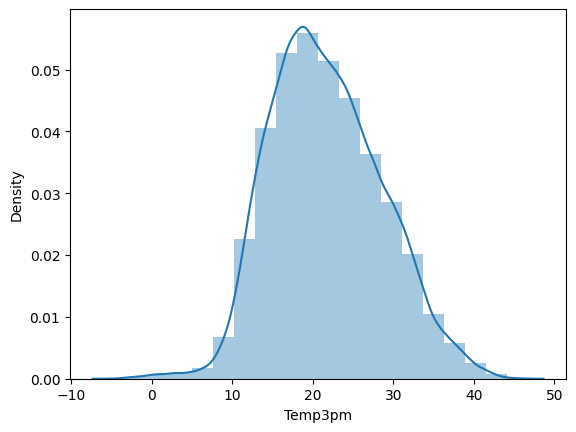

In [24]:
# 10. Temp3pm
Temp3pm = sns.distplot(data['Temp3pm'], bins=20, kde=True)
Temp3pm

In [25]:
data['Rainfall'] = data['Rainfall'].fillna(data['Rainfall'].median())
data['WindGustSpeed'] = data['WindGustSpeed'].fillna(data['WindGustSpeed'].median())
data['WindSpeed9am'] = data['WindSpeed9am'].fillna(data['WindSpeed9am'].median())
data['WindSpeed3pm'] = data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].median())
data['Humidity9am'] = data['Humidity9am'].fillna(data['Humidity9am'].median())

In [26]:
data = data.dropna()

In [27]:
data.isnull().sum().any()

False

Lalu untuk memastikan bahwa dataset telah bebas dari missing value / bersih, maka akan dilakukan sintaks seperti diatas. Sintaks diatas berguna untuk mengecek apakah masih ada nilai missing value yang terdapat untuk setiap kolom, dan akan direturn dengan boolean statement. Jika False maka data sudah bersih dan siap untuk dieksplor, tapi jika True maka masih terdapat nilai null pada dataset tersebut.

<br>

## **Data Exploration**

### **Data Query and Grouping**

In [28]:
# 1. Melakukan query pada atribut RainTomorrow yang bernilai "Yes" dan RainTomorrow yang bernilai "Yes"
data[(data['RainTomorrow'] == 'Yes') & (data['RainToday'] >= "Yes")]

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
11,2008-12-12,Albury,15.9,21.7,2.2,NNE,31.0,NE,ENE,15.0,13.0,89.0,91.0,15.9,17.0,Yes,Yes
12,2008-12-13,Albury,15.9,18.6,15.6,W,61.0,NNW,NNW,28.0,28.0,76.0,93.0,17.4,15.8,Yes,Yes
17,2008-12-18,Albury,13.5,22.9,16.8,W,63.0,N,WNW,6.0,20.0,80.0,65.0,18.0,21.5,Yes,Yes
102,2009-03-13,Albury,17.1,25.8,5.8,ENE,31.0,N,S,0.0,13.0,82.0,68.0,19.0,23.8,Yes,Yes
103,2009-03-14,Albury,16.4,27.0,3.0,SW,69.0,E,N,9.0,22.0,82.0,74.0,19.9,19.7,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145306,2017-01-23,Uluru,23.1,34.5,6.4,SSW,50.0,ENE,W,19.0,7.0,79.0,56.0,26.0,32.9,Yes,Yes
145321,2017-02-07,Uluru,24.4,37.9,7.6,NE,72.0,E,NE,17.0,31.0,69.0,35.0,27.7,37.0,Yes,Yes
145391,2017-04-18,Uluru,15.2,21.5,6.8,ENE,30.0,NE,ENE,19.0,9.0,65.0,65.0,19.0,21.2,Yes,Yes
145392,2017-04-19,Uluru,17.7,26.9,12.6,S,35.0,E,SSW,15.0,20.0,93.0,59.0,19.0,26.0,Yes,Yes


Berdasarkan hasil query diatas, terdapat 14017 data yang menunjukkan jika hujan terjadi pada hari tersebut, maka esok hari  terjadi hujan.

In [29]:
# 2. Melakukan query pada atribut RainTomorrow yang bernilai "Yes" dan RainTomorrow yang bernilai "No"
data[(data['RainTomorrow'] == 'Yes') & (data['RainToday'] >= "No")]

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8,2008-12-09,Albury,9.7,31.9,0.0,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,18.3,30.2,No,Yes
10,2008-12-11,Albury,13.4,30.4,0.0,N,30.0,SSE,ESE,17.0,6.0,48.0,22.0,20.4,28.8,No,Yes
11,2008-12-12,Albury,15.9,21.7,2.2,NNE,31.0,NE,ENE,15.0,13.0,89.0,91.0,15.9,17.0,Yes,Yes
12,2008-12-13,Albury,15.9,18.6,15.6,W,61.0,NNW,NNW,28.0,28.0,76.0,93.0,17.4,15.8,Yes,Yes
16,2008-12-17,Albury,14.1,20.9,0.0,ENE,22.0,SSW,E,11.0,9.0,69.0,82.0,17.2,18.1,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145324,2017-02-10,Uluru,24.8,39.8,0.4,WNW,65.0,E,ENE,15.0,20.0,38.0,24.0,31.5,36.6,No,Yes
145390,2017-04-17,Uluru,19.3,24.4,0.0,W,35.0,ESE,SSE,7.0,19.0,28.0,91.0,21.3,18.5,No,Yes
145391,2017-04-18,Uluru,15.2,21.5,6.8,ENE,30.0,NE,ENE,19.0,9.0,65.0,65.0,19.0,21.2,Yes,Yes
145392,2017-04-19,Uluru,17.7,26.9,12.6,S,35.0,E,SSW,15.0,20.0,93.0,59.0,19.0,26.0,Yes,Yes


Sedangkan, untuk query diatas diperoleh sekitar 30681 data yang menunjukkan bahwa jika hari tersebut terjadi hujan, maka esok hari tidak terjadi hujan. Sehingga dapat disimpulkan bahwa lebih banyak data yang dihasilkan pada query nomor 2 dibandingkan query nomor 1 yang menyatakan secara tidak langsung bahwa jika suatu hari hujan, maka belum tentu esok harinya akan hujan.

In [30]:
# 3. Melakukan query pada atribut RainTomorrow yang memiliki nilai "Yes" dan WindGustDir bernilai "W"
data[(data['Rainfall'] >= data['Rainfall'].median()) & (data['WindGustDir'] == 'W')]

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,W,50.0,SW,W,20.0,24.0,49.0,19.0,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,16.3,25.5,No,No
9,2008-12-10,Albury,13.1,30.1,1.4,W,28.0,S,SSE,15.0,11.0,58.0,27.0,20.1,28.2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145303,2017-01-20,Uluru,26.0,34.4,1.8,W,39.0,NW,NW,17.0,20.0,67.0,53.0,29.9,32.4,Yes,Yes
145313,2017-01-30,Uluru,23.8,41.3,0.0,W,41.0,E,SSE,4.0,7.0,32.0,18.0,33.8,39.0,No,No
145316,2017-02-02,Uluru,27.5,36.5,0.0,W,39.0,ESE,E,13.0,24.0,50.0,34.0,29.0,35.4,No,Yes
145390,2017-04-17,Uluru,19.3,24.4,0.0,W,35.0,ESE,SSE,7.0,19.0,28.0,91.0,21.3,18.5,No,Yes


Untuk query nomor 3 kita akan melihat seberapa banyak hujan terjadi ketika arah angin berhembus barat. Hal ini dikarenakan angin muson barat akan menyebabkan curah hujan yang tinggi. Sehingga kita akan menggunakan median dari rainfall sebagai threshold curah hujan. Jika lebih besar daripada threshold, kita dapat melihat data dengan curah hujan tinggi yang memiliki arah angin ke Barat. Berdasarkan hasil query, terdapat 17427 data yang memenuhi query ke-3.  

In [31]:
# 4. Melakukan query pada atribut RainTomorrow yang bernilai "No" dan data yang memiliki nilai WindGustSpeed dibawah rata-rata
data[(data['RainTomorrow'] == 'No') & (data['WindGustSpeed'] <= data['WindGustSpeed'].mean())]

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,W,35.0,SSE,W,6.0,17.0,48.0,19.0,16.3,25.5,No,No
9,2008-12-10,Albury,13.1,30.1,1.4,W,28.0,S,SSE,15.0,11.0,58.0,27.0,20.1,28.2,Yes,No
14,2008-12-15,Albury,8.4,24.6,0.0,W,39.0,S,WNW,4.0,30.0,57.0,32.0,15.9,23.5,No,No
19,2008-12-20,Albury,9.8,25.6,0.0,SSE,26.0,SE,NNW,17.0,6.0,45.0,26.0,15.8,23.2,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,9.4,20.9,No,No
145455,2017-06-21,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,12.5,26.1,No,No


Untuk query nomor 4 kita akan melihat data untuk RainTomorrow yang bernilai "No" dengan kecepatan angin dibawah rata-rata. 

Pada tahap data exploration ini kita juga akan membuat 2 atribut baru yang akan digunakan pada saat proses visualisasi data nanti. Atribut baru tersebut ialah Year dan Month yang merupakan hasil ekstrak dari atribut Date.

In [32]:
data['Year'] = pd.to_datetime(data['Date']).dt.strftime("%Y").astype(int)
data.head()

C:\Users\tsaab\AppData\Local\Temp\ipykernel_26924\1420820286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = pd.to_datetime(data['Date']).dt.strftime("%Y").astype(int)


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No,2008
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No,2008
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No,2008
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No,2008


In [33]:
data['Month'] = pd.to_datetime(data['Date']).dt.strftime("%m").astype(int)
data.head()

C:\Users\tsaab\AppData\Local\Temp\ipykernel_26924\3423749248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = pd.to_datetime(data['Date']).dt.strftime("%m").astype(int)


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No,2008,12
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No,2008,12
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No,2008,12
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No,2008,12
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No,2008,12


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139877 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           139877 non-null  object 
 1   Location       139877 non-null  object 
 2   MinTemp        139877 non-null  float64
 3   MaxTemp        139877 non-null  float64
 4   Rainfall       139877 non-null  float64
 5   WindGustDir    139877 non-null  object 
 6   WindGustSpeed  139877 non-null  float64
 7   WindDir9am     139877 non-null  object 
 8   WindDir3pm     139877 non-null  object 
 9   WindSpeed9am   139877 non-null  float64
 10  WindSpeed3pm   139877 non-null  float64
 11  Humidity9am    139877 non-null  float64
 12  Humidity3pm    139877 non-null  float64
 13  Temp9am        139877 non-null  float64
 14  Temp3pm        139877 non-null  float64
 15  RainToday      139877 non-null  object 
 16  RainTomorrow   139877 non-null  object 
 17  Year           139877 non-nul

In [35]:
# b. Data Grouping
group1 = data[(data['Year'] >= 2010)].groupby(['Location','Year'])['Rainfall'].sum()
group1

Location  Year
Adelaide  2010    592.6
          2011    528.0
          2012    516.4
          2013    495.6
          2014    534.2
                  ...  
Woomera   2013    132.6
          2014    115.0
          2015    158.6
          2016    231.9
          2017    103.1
Name: Rainfall, Length: 377, dtype: float64

Selanjutnya pada proses diatas, kita akan melakukan grouping terhadap atribut Year dengan nilai Year >= 2010 dengan atribut Location dan akan ditampilkan total rainfall yang terjadi setiap tahunnya untuk setiap lokasi.

### **Central Tendency**

In [36]:
# 1. Mencari mean
# Menemukan waktu rata-rata dari kolom Rainfall
mean = data['Rainfall'].mean()
print(mean)

# 2. Mencari mode
# Menemukan modus dari temprature pada data perjalanan
mode = data['WindGustDir'].mode()
print(mode)

# 3. Mencari median
median = statistics.median(data['WindGustSpeed'])
print(median)

2.294950563709545
0    W
Name: WindGustDir, dtype: object
39.0


Untuk central tendency kita akan mencoba menghitung rata-rata dari rainfall, modus dari WindGustDir dan median dari WindGustSpeed. Rata-rata dari rainfall yang dihasilkan yaitu sebesar 2.29, dan modus untuk WindGustDir ialah W, sehingga banyak data yang memiliki arah angin yang berhembus ke barat. Lalu median untuk WindGustSpeed sebesar 39. Nilai ini bisa kita gunakan sebagai threshold nantinya, untuk mengukur apakah kecepatan angin tergolong cepat atau pelan.

### **Variability**

In [37]:
# 1. Variance
var = np.var(data['Rainfall'], ddof=1)
print("Variance of Rainfall: ", var)
# 2. Standard Deviation
std = np.std(data['Rainfall'], ddof=1)
print("Standard Deviation of Rainfall: ", std)
# 3. Skewness
z = data['Rainfall']
z.skew()
print("Skewness: ", z.skew())
# 4. Percentiles
percentile = np.percentile(z, [25, 50, 75])
print("Percentile: ", percentile)
# 5. Ranges
range = np.ptp(z)
print("Range: ", range)

Variance of Rainfall:  69.43852900842995
Standard Deviation of Rainfall:  8.332978399613786
Skewness:  9.95365056957896
Percentile:  [0.  0.  0.6]
Range:  371.0


Sedangkan untuk central tendency, kita akan menghitung varians, standar deviasi, skewness, percentiles dan ranges untuk atribut Rainfall.

<br>

## **Data Visualization**

Untuk visualisasi data, kita akan membuat area plot untuk melihat tingkat curah hujan yang terjadi selama 10 tahun (2010-2017) di 5 kota terbanyak yang tercatat di dalam dataset. Lalu untuk visualisasi selanjutnya, kita akan membuat barchart yang akan merepresentasi proporsi banyaknya data hujan yang tercatat per bulannya.

Untuk itu, kita akan menampilkan 5 kota yang paling sering muncul dalam pelaporan data hujan.

In [38]:
data['Location'].value_counts().head(5)

Canberra    3403
Sydney      3324
Darwin      3189
Perth       3184
Adelaide    3181
Name: Location, dtype: int64

Setelah itu, kita akan membuat dataframe untuk masing-masing kota dengan menggunakan group1 (yang telah dibuat sebelumnya) sebagai group yang akan menampung data curah hujan yang terjadi selama 10 tahun (2010-2017).

In [39]:
Canberra = group1['Canberra']
Canberra = Canberra.to_frame()
Canberra.rename(columns={'Rainfall':'Canberra'}, inplace = True)
Canberra

,Canberra
Year,
2010,959.8
2011,538.8
2012,651.8
2013,503.8
2014,568.6
2015,545.6
2016,788.2
2017,182.2


In [40]:
Sydney = group1['Sydney']
Sydney = Sydney.to_frame()
Sydney.rename(columns={'Rainfall':'Sydney'}, inplace = True)
Sydney

,Sydney
Year,
2010,1131.4
2011,1163.0
2012,1121.0
2013,1179.0
2014,897.2
2015,1338.2
2016,1385.6
2017,865.8


In [41]:
Darwin = group1['Darwin']
Darwin = Darwin.to_frame()
Darwin.rename(columns={'Rainfall':'Darwin'}, inplace = True)
Darwin

,Darwin
Year,
2010,2257.2
2011,2489.0
2012,1518.8
2013,1348.0
2014,1547.4
2015,1705.6
2016,1355.0
2017,1739.0


In [42]:
Melbourne = group1['Melbourne']
Melbourne = Melbourne.to_frame()
Melbourne.rename(columns={'Rainfall':'Melbourne'}, inplace = True)
Melbourne

,Melbourne
Year,
2010,776.6
2011,726.6
2012,570.0
2013,574.6
2014,472.8
2015,5.6
2016,458.4
2017,257.6


In [43]:
Brisbane = group1['Brisbane']
Brisbane = Brisbane.to_frame()
Brisbane.rename(columns={'Rainfall':'Brisbane'}, inplace = True)
Brisbane

,Brisbane
Year,
2010,1658.4
2011,1072.0
2012,1126.4
2013,841.0
2014,790.0
2015,1443.2
2016,736.4
2017,554.8


Lalu dataframe dari 5 kota yang telah dibuat tadi akan diconcat menjadi dataframe yang baru yang akan menampung semua hasil dataframe dari setiap kota. Hal ini dilakukan untuk memudahkan dalam melakukan plotting.

In [44]:
df5 = pd.concat([Canberra, Sydney, Darwin,
                 Melbourne, Brisbane], axis=1)
df5

,Canberra,Sydney,Darwin,Melbourne,Brisbane
Year,,,,,
2010,959.8,1131.4,2257.2,776.6,1658.4
2011,538.8,1163.0,2489.0,726.6,1072.0
2012,651.8,1121.0,1518.8,570.0,1126.4
2013,503.8,1179.0,1348.0,574.6,841.0
2014,568.6,897.2,1547.4,472.8,790.0
2015,545.6,1338.2,1705.6,5.6,1443.2
2016,788.2,1385.6,1355.0,458.4,736.4
2017,182.2,865.8,1739.0,257.6,554.8


### **Area Plot**

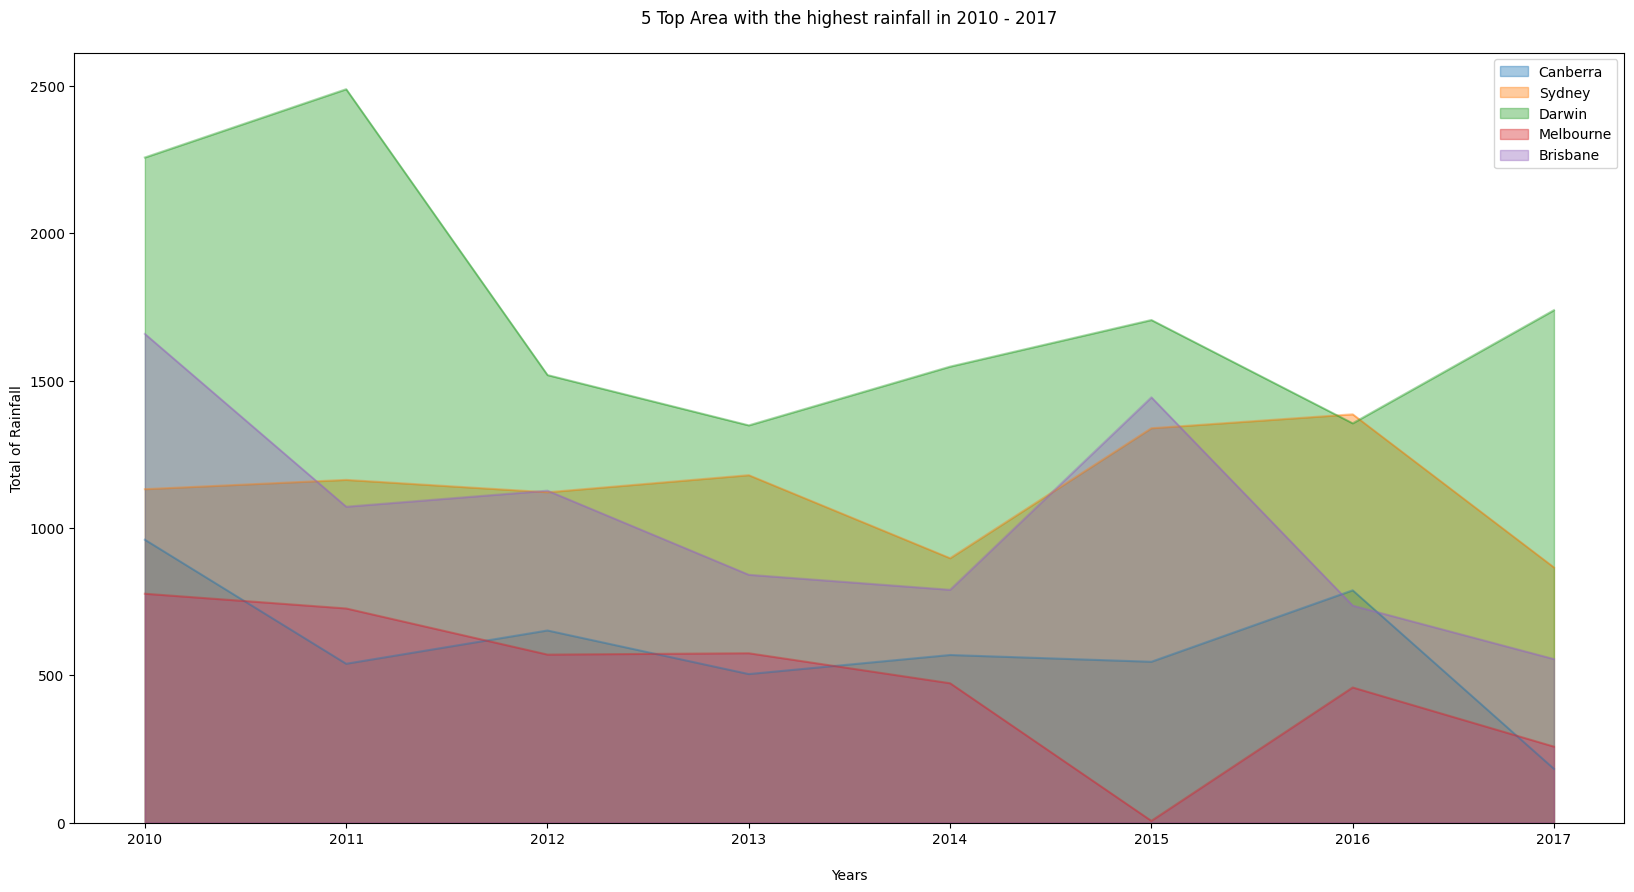

In [45]:
df5.plot(kind='area', alpha=0.40, stacked=False, figsize=(20,10))
plt.title('5 Top Area with the highest rainfall in 2010 - 2017\n')
plt.ylabel('Total of Rainfall')
plt.xlabel('\nYears')
plt.show()

Berdasarkan hasil diatas, total curah hujan tertinggi diperoleh kota Darwin yang terjadi pada tahun 2011 dengan total curah hujan sebanyak 2500. Sedangkan untuk total curah hujan terendah diperoleh kota Melbourne yang terjadi pada tahun 2015 dengan total curah hujan hampir mendekati 0. 

### **Barchart**

In [46]:
data['Month'].value_counts()

5     12823
3     12803
1     12717
6     12166
7     11640
10    11615
8     11562
11    11283
9     11219
4     11025
12    10661
2     10363
Name: Month, dtype: int64

0         Dec
1         Dec
2         Dec
3         Dec
4         Dec
         ... 
145454    Jun
145455    Jun
145456    Jun
145457    Jun
145458    Jun
Name: Month, Length: 139877, dtype: category
Categories (12, object): ['Jan' < 'Feb' < 'Mar' < 'Apr' ... 'Sep' < 'Oct' < 'Nov' < 'Dec']

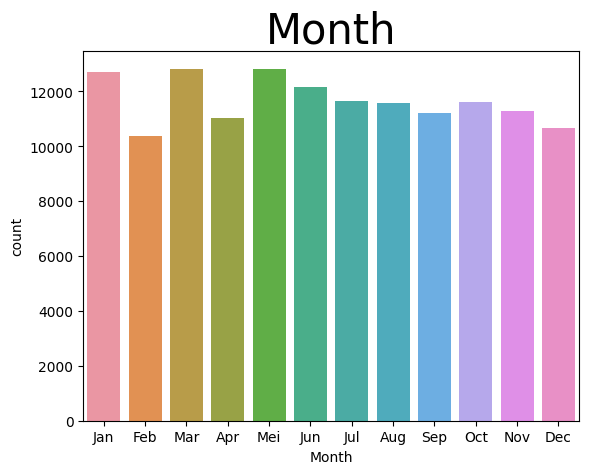

In [47]:
proportion=pd.cut(x=data['Month'],bins=[0,1,2,3,4,5,6,7,8,9,10,11,12],labels = ['Jan','Feb','Mar','Apr','Mei','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title('Month',fontsize=30)
sns.countplot(x=proportion)
proportion

Sedangkan untuk hasil visualisasi kedua dengan menggunakan barchart, kita dapat melihat bahwa bulan Mei adalah bulan yang paling banyak tercatat dalam data hujan. Hal ini ditunjukkan dengan tingginya barchart yang dihasilkan pada bulan Mei yaitu sebanyak 12823 kali. 

<br>

## **Data Preprocessing**

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139877 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           139877 non-null  object 
 1   Location       139877 non-null  object 
 2   MinTemp        139877 non-null  float64
 3   MaxTemp        139877 non-null  float64
 4   Rainfall       139877 non-null  float64
 5   WindGustDir    139877 non-null  object 
 6   WindGustSpeed  139877 non-null  float64
 7   WindDir9am     139877 non-null  object 
 8   WindDir3pm     139877 non-null  object 
 9   WindSpeed9am   139877 non-null  float64
 10  WindSpeed3pm   139877 non-null  float64
 11  Humidity9am    139877 non-null  float64
 12  Humidity3pm    139877 non-null  float64
 13  Temp9am        139877 non-null  float64
 14  Temp3pm        139877 non-null  float64
 15  RainToday      139877 non-null  object 
 16  RainTomorrow   139877 non-null  object 
 17  Year           139877 non-nul

Selanjutnya pada tahap data preprocessing ini, akan dilakukan proses feature selection terlebih dahulu. Untuk diawal atribut Date dihapus, dikarenakan sudah adanya atribut yang merepresentasi Date seperti atribut Year dan Month. Selain itu, pertimbangannya lagi ialah, jika atribut Date digunakan maka akan semakin banyak kolom yang dihasilkan pada proses one hot encoder nanti, mengingat atribut date adalah categorical.

In [49]:
data = data.drop(['Date'], axis=1)
data

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,No,No,2008,12
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,No,No,2008,12
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,No,No,2008,12
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,No,No,2008,12
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,No,No,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,9.4,20.9,No,No,2017,6
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,10.1,22.4,No,No,2017,6
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,10.9,24.5,No,No,2017,6
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,12.5,26.1,No,No,2017,6


Lalu akan dilakukan proses enconding pada atribut yang bersifat categorical. Untuk atribut categorical binary class seperti RainToday dan RainTomorrow akan dilakukan proses label encoder dan hasilnya akan diupdate ke dalam dataframe.

In [50]:
# melakukan proses label encoder untuk 2 atribut categorical yang sifatnya binary class
le_col = ['RainToday','RainTomorrow']
label = LabelEncoder()

for col in le_col:
    data[col] = label.fit_transform(data[col])
data

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,16.9,21.8,0,0,2008,12
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,17.2,24.3,0,0,2008,12
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,21.0,23.2,0,0,2008,12
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,18.1,26.5,0,0,2008,12
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,59.0,27.0,9.4,20.9,0,0,2017,6
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,10.1,22.4,0,0,2017,6
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,10.9,24.5,0,0,2017,6
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,12.5,26.1,0,0,2017,6


Sedangkan untuk atribut categorical yang multiclass akan dilakukan proses one hot encoder dengan menggunakan pandas.

In [51]:
multiclass = ['Location','WindGustDir','WindDir9am','WindDir3pm']
label = data['RainTomorrow']

In [52]:
# melakukan proses one hot encoder untuk 4 atribut categorical yang multiclass
encoded = pd.get_dummies(data[multiclass])
encoded

,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145456,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


Hasil dari one hot encoder tidak langsung diupdate ke dalam dataframe, tapi akan dilakukan chi-squared terlebih dahulu untuk melihat korelasi yang terjadi antar sesama atribut categorical multiclass. Jika atribut tidak memiliki korelasi terhadap atribut RainTomorrow (nilai p-value lebih besar dari 0.5), maka atribut tersebut akan dihapus. 

In [53]:
# cek korelasi terhadap label untuk atribut categorical
f_score = chi2(encoded,label)

In [54]:
f_score[1]

array([6.15269461e-01, 3.68883626e-20, 3.13997659e-02, 1.35447172e-76,
       6.01479138e-04, 1.02889650e-06, 4.19628785e-06, 5.57171584e-01,
       1.66866400e-35, 7.52596256e-07, 5.12221968e-32, 4.32571563e-21,
       6.95961747e-30, 1.18566015e-10, 1.44287683e-06, 7.93660666e-03,
       3.70707103e-05, 1.96655621e-01, 5.87451173e-02, 7.56492918e-01,
       1.69653307e-48, 1.93055170e-31, 1.92862265e-28, 9.27703389e-06,
       1.03130093e-03, 3.69991060e-10, 5.89876564e-12, 3.09507921e-30,
       2.12590848e-03, 2.02796050e-11, 7.76511388e-03, 2.22288825e-02,
       4.34646438e-05, 1.78290810e-76, 2.19391656e-05, 4.56871314e-01,
       6.31331729e-15, 3.22252658e-08, 6.48964233e-07, 1.10022453e-10,
       1.93084144e-05, 1.44775508e-42, 4.68310047e-08, 5.65954115e-38,
       8.61692816e-04, 8.27111054e-02, 9.71894507e-17, 3.19701210e-02,
       4.86021167e-89, 5.21485670e-59, 3.14326100e-39, 4.02991052e-28,
       3.60826750e-27, 5.35530428e-13, 1.15675540e-01, 1.30173117e-31,
      

In [55]:
pvalues = pd.Series(f_score[1])
pvalues.index = encoded.columns

In [56]:
pvalues[0:51].sort_values(ascending=False)

Location_MelbourneAirport    7.564929e-01
Location_Adelaide            6.152695e-01
Location_Brisbane            5.571716e-01
Location_Sale                4.568713e-01
Location_Launceston          1.966556e-01
Location_Williamtown         8.271111e-02
Location_Melbourne           5.874512e-02
Location_Wollongong          3.197012e-02
Location_Albury              3.139977e-02
Location_Perth               2.222888e-02
Location_Hobart              7.936607e-03
Location_Penrith             7.765114e-03
Location_Nuriootpa           2.125908e-03
Location_Newcastle           1.031301e-03
Location_Watsonia            8.616928e-04
Location_BadgerysCreek       6.014791e-04
Location_PerthAirport        4.346464e-05
Location_Katherine           3.707071e-05
Location_Richmond            2.193917e-05
Location_Tuggeranong         1.930841e-05
Location_MountGinini         9.277034e-06
Location_Bendigo             4.196288e-06
Location_GoldCoast           1.442877e-06
Location_Ballarat            1.028

In [57]:
pvalues[52:98].sort_values(ascending=False)

WindDir3pm_SSW     9.961125e-01
WindDir3pm_WSW     6.883725e-01
WindDir9am_SSW     5.837241e-01
WindGustDir_SSW    5.384979e-01
WindGustDir_S      5.383190e-01
WindGustDir_NNE    1.156755e-01
WindDir9am_SW      9.148327e-02
WindDir3pm_S       6.191651e-02
WindGustDir_WSW    4.865223e-02
WindDir9am_NE      2.264840e-03
WindDir9am_WSW     4.347943e-05
WindDir3pm_NNE     1.736943e-05
WindGustDir_SW     1.373677e-05
WindDir3pm_SE      3.746415e-06
WindDir9am_S       7.246474e-08
WindGustDir_SSE    6.586875e-10
WindDir3pm_SW      2.366560e-10
WindDir3pm_W       1.728841e-12
WindDir3pm_NE      8.524538e-13
WindGustDir_NE     5.355304e-13
WindDir3pm_SSE     1.763926e-13
WindDir9am_W       3.500310e-14
WindGustDir_SE     1.175003e-15
WindDir9am_WNW     1.521010e-16
WindDir3pm_ENE     7.527766e-20
WindDir9am_ENE     4.779804e-22
WindDir9am_NNE     1.856221e-22
WindDir9am_SSE     9.086136e-23
WindDir9am_N       8.167472e-24
WindDir3pm_ESE     1.671674e-26
WindDir3pm_E       8.056594e-27
WindGust

Berdasarkan list nilai p-value diatas, maka atribut yang memiliki nilai p-value lebih besar dari 0.5 akan dihapus, seperti atribut MelbourneAirport, Adelaide, Brisbane, Sale, Launceston, WindDir3pm_SSW, WindDir3pm_WSW, Wind9am_SSW, WindGustDir_SSW, dan WindGustDir_NNE.

Sedangkan untuk data yang bersifat numerical (termasuk atribut RainToday dan RainTomorrow karena sudah dilabelencoder) akan dilihat korelasinya dengan menggunakan corr map yang dibuat menggunakan seaborn. Jika nilai yang dihasilkan sama dengan 0, maka atribut tersebut tidak memiliki korelasi terhadap atribut RainTomorrow dan dipertimbangkan untuk dihapus.

C:\Users\tsaab\AppData\Local\Temp\ipykernel_26924\4247348418.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  col_corr=data.corr()


<Axes: >

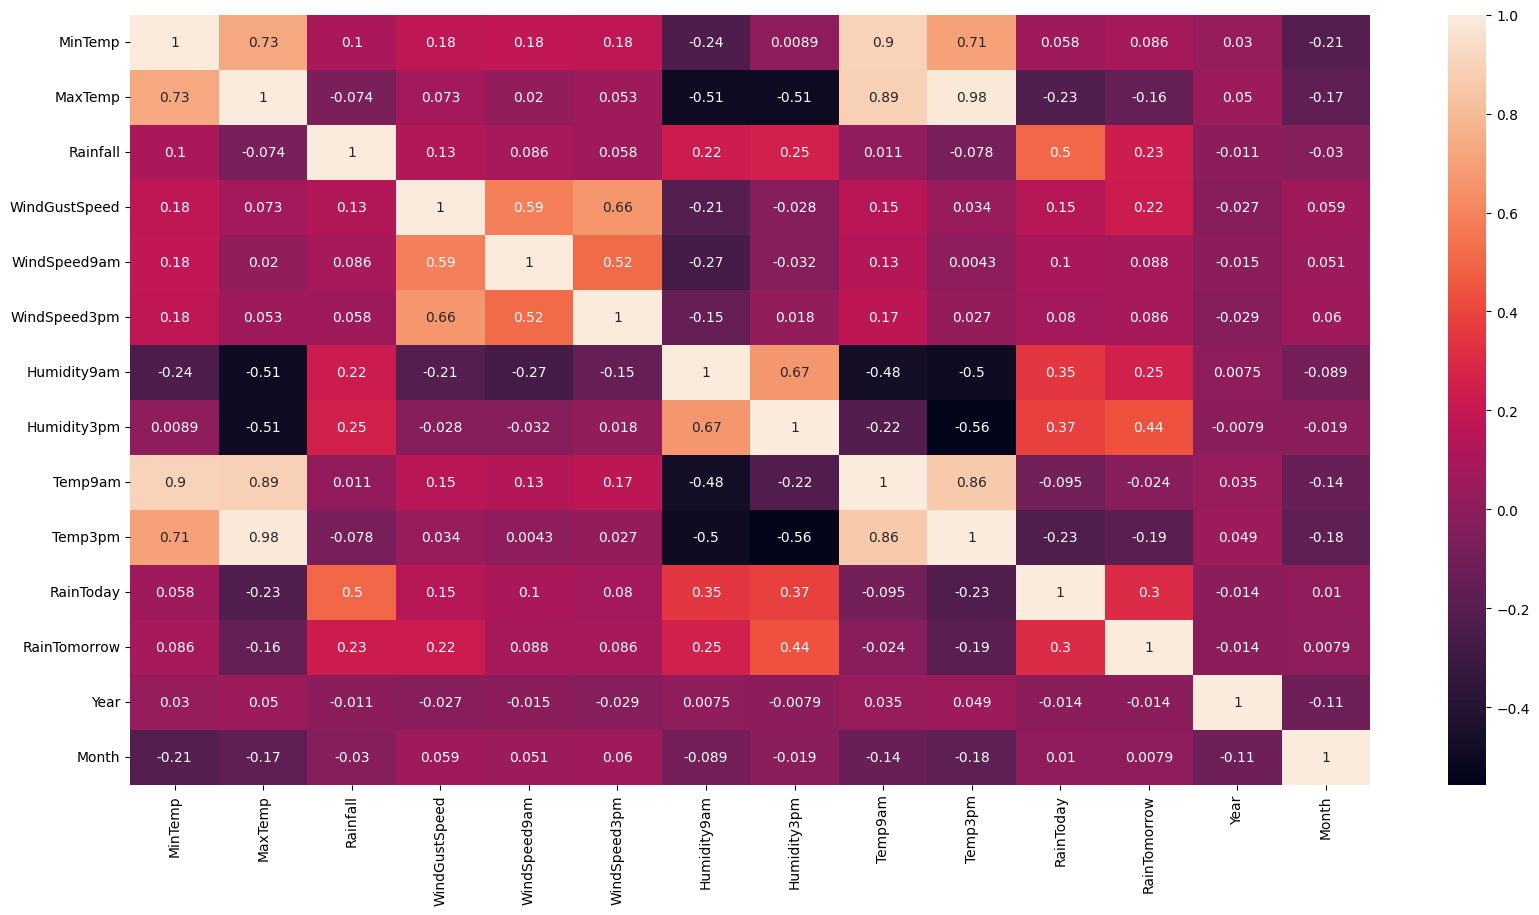

In [58]:
# cek korelasi terhadap label dengan corr map untuk numerical
col_corr=data.corr()
plt.figure(figsize = (20,10))
sns.heatmap(col_corr,annot=True)

In [59]:
related = col_corr['RainTomorrow'].sort_values(ascending = False)
related.abs()

RainTomorrow     1.000000
Humidity3pm      0.440647
RainToday        0.303798
Humidity9am      0.252722
Rainfall         0.232813
WindGustSpeed    0.222072
WindSpeed9am     0.087946
WindSpeed3pm     0.086332
MinTemp          0.086140
Month            0.007939
Year             0.014170
Temp9am          0.023842
MaxTemp          0.155063
Temp3pm          0.188921
Name: RainTomorrow, dtype: float64

In [60]:
# dari kesimpulan diatas kita akan memilih atribut yang memiliki nilai korelasi 
# diatas 0 (pertimbangannya semakin dekat dengan 0 semakin sedikit korelasinya)
# jadi yang dibuang
# WindSpeed9am, WindSpeed3pm, MinTemp, Month, Year, Temp9am

Dari hasil diatas, maka atribut yang akan dihapus ialah WindSpeed9am, WindSpeed3pm, MinTemp, Month, Year, Temp9am. Hal ini dikarenakan korelasi yang dihasilkan sama dengan 0

Kemudian, data hasil one hot encoder tadi akan dijoin dengan dataframe sebelumnya. Setelah dijoin maka akan dilakukan drop pada beberapa atribut yang tidak memiliki korelasi seperti proses diatas sebelumnya.

In [61]:
# lakukan join data hasil label encode dan one-hot encode
# lalu drop pada atribut yang tidak memiliki korelasi
data = data.join(encoded)
data

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,0,0,0,0,0,0,0,0,1,0
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,0,0,0,0,0,0,0,0,0,1
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,0,0,0,0,0,0,0,0,0,1
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,0,0,0,0,0,0,0,0,0,0
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,...,0,0,0,0,0,0,0,0,0,0
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,...,0,0,0,0,0,0,0,0,0,0
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,...,0,0,0,0,0,0,0,0,0,0
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,...,0,0,0,0,0,0,0,0,1,0


In [62]:
data.drop(['Location','WindGustDir','WindDir9am','WindDir3pm','WindSpeed9am','WindSpeed3pm','MinTemp','Month','Year','Temp9am','WindDir3pm_SSW','WindDir3pm_WSW','WindDir9am_SSW','WindGustDir_SSW','WindGustDir_NNE'], axis=1,inplace=True)
data

,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Temp3pm,RainToday,RainTomorrow,Location_Adelaide,Location_Albany,...,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW
0,22.9,0.6,44.0,71.0,22.0,21.8,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,25.1,0.0,44.0,44.0,25.0,24.3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,25.7,0.0,46.0,38.0,30.0,23.2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28.0,0.0,24.0,45.0,16.0,26.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,32.3,1.0,41.0,82.0,33.0,29.7,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,21.8,0.0,31.0,59.0,27.0,20.9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145455,23.4,0.0,31.0,51.0,24.0,22.4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145456,25.3,0.0,22.0,56.0,21.0,24.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145457,26.9,0.0,37.0,53.0,24.0,26.1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Kemudian dilakukan split terhadap x dan y. x akan menampung fitur-fitur yang akan digunakan, sedangkan y merupakan variabel dari class yaitu RainTomorrow. 

In [63]:
x = data.drop(['RainTomorrow'], axis=1)
x

,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Temp3pm,RainToday,Location_Adelaide,Location_Albany,Location_Albury,...,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW
0,22.9,0.6,44.0,71.0,22.0,21.8,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,25.1,0.0,44.0,44.0,25.0,24.3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,25.7,0.0,46.0,38.0,30.0,23.2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,28.0,0.0,24.0,45.0,16.0,26.5,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,32.3,1.0,41.0,82.0,33.0,29.7,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,21.8,0.0,31.0,59.0,27.0,20.9,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145455,23.4,0.0,31.0,51.0,24.0,22.4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145456,25.3,0.0,22.0,56.0,21.0,24.5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
145457,26.9,0.0,37.0,53.0,24.0,26.1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [64]:
y = data['RainTomorrow']
y

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainTomorrow, Length: 139877, dtype: int32

<br>

## **Data Modelling**

Pada data modelling akan dilakukan split data training dan data testing. Disini akan digunakan test_size sebesar 0.3 atau 30% digunakan sebagai data testing dan 70% data training.

In [65]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=33, shuffle =True)
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (97913, 99)
X_test shape is  (41964, 99)
y_train shape is  (97913,)
y_test shape is  (41964,)


Kita akan menggunakan 5 jenis algoritma disini yaitu Logistic Regression, Decission Tree, Random Forest, Naive Baye, dan KNN. Kemudian untuk masing-masing algoritma akan digunakan ROC yang menunjukkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR) pada berbagai nilai ambang batas (threshold) yang digunakan untuk memprediksi kelas target dan AUC adalah matrix yang dihitung dari luas di bawah kurva ROC, confusion matrix untuk menampilkan hasil prediksi dan aktual untuk masing-masing class, serta classification report untuk melihat akurasi yang dihasilkan.

### **Logistic Regression**

In [66]:
# proses prediksi label dengan LinearRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

c:\Users\tsaab\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

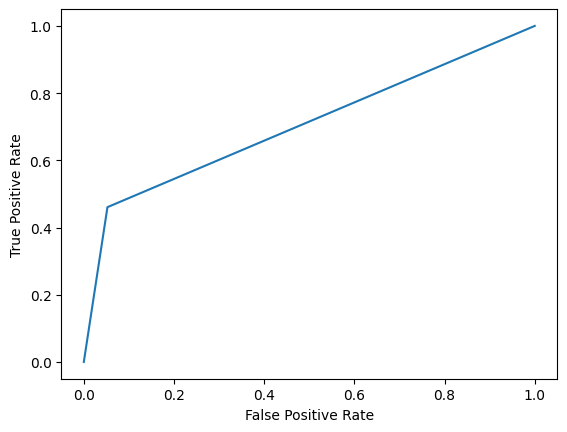

In [67]:
#define metrics
pred_lr = lr.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,pred_lr)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Untuk membaca hasil kurva ROC, dapat dilihat bentuk dan posisi kurva pada grafik. Semakin dekat kurva ROC ke sudut kiri atas grafik, semakin baik kinerja model, karena TPR lebih tinggi daripada FPR.

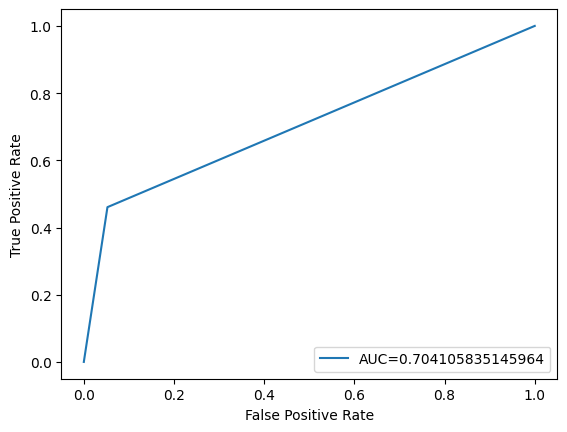

In [68]:
#define metrics
pred_lr = lr.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,pred_lr)
auc = metrics.roc_auc_score(y_test,pred_lr)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

Hasil AUC adalah nilai numerik antara 0 dan 1 yang menunjukkan seberapa baik model klasifikasi membedakan antara dua kelas yang berbeda. Nilai AUC 1 berarti model sempurna dalam membedakan kelas positif dan negatif, sedangkan nilai AUC 0,5 menunjukkan model memiliki kemampuan membedakan yang sama dengan pengacakan acak.

Berdasarkan hasil diatas diperoleh nilai AUC sebesar 0.7 yang berarti model sudah cukup baik dalam membedakan kelas postif dan negatif.

In [69]:
print(metrics.accuracy_score(y_test, pred_lr))
matrix = confusion_matrix(y_test, pred_lr)
print(matrix)

0.8397674196930702
[[30960  1712]
 [ 5012  4280]]


<Axes: >

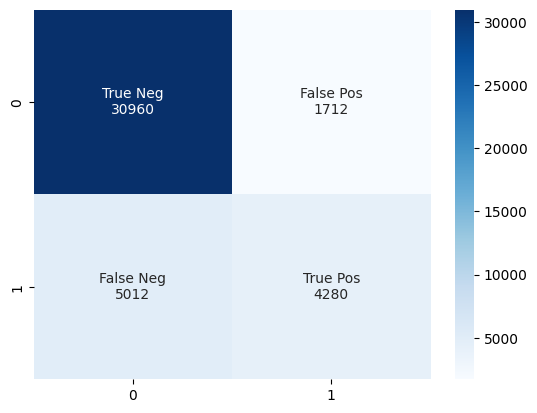

In [70]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

In [71]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90     32672
           1       0.71      0.46      0.56      9292

    accuracy                           0.84     41964
   macro avg       0.79      0.70      0.73     41964
weighted avg       0.83      0.84      0.83     41964



Lalu untuk akurasi yang dihasilkan sebesar 0.84 yang berarti model sudah cukup bagus. Selain itu terdapat confusion matrix yang memetakan hasil prediksi dan aktual untuk masing-masing class.

### **Decision Tree**

In [72]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

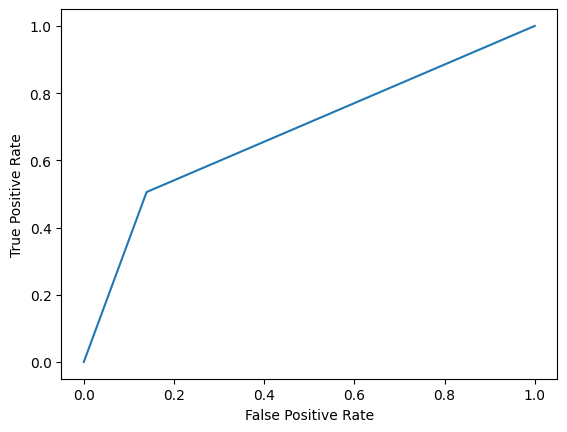

In [73]:
#define metrics
pred_dt = dt.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,pred_dt)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

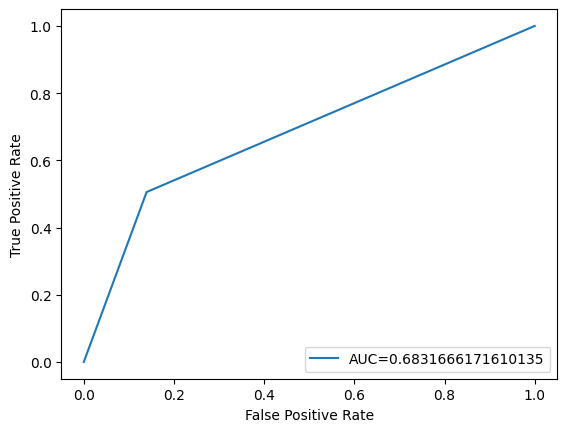

In [74]:
#define metrics
pred_dt = dt.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,pred_dt)
auc = metrics.roc_auc_score(y_test,pred_dt)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [75]:
print(metrics.accuracy_score(y_test, pred_dt))
matrix = confusion_matrix(y_test, pred_dt)
print(matrix)

0.7820989419502431
[[28122  4550]
 [ 4594  4698]]


<Axes: >

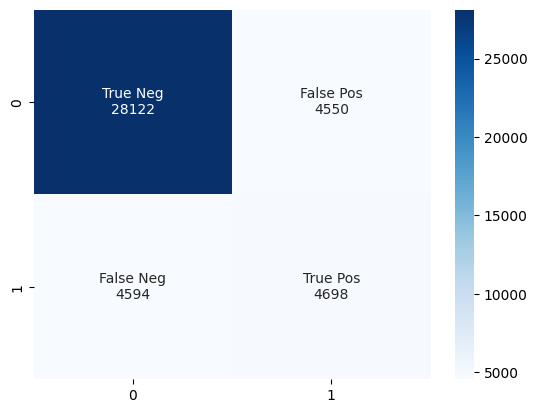

In [76]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

In [77]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     32672
           1       0.51      0.51      0.51      9292

    accuracy                           0.78     41964
   macro avg       0.68      0.68      0.68     41964
weighted avg       0.78      0.78      0.78     41964



Untuk algoritma decission tree dihasilkan AUC sebesar 0.68 serta nilai akurasi sebesar 0.78

### **Random Forest**

In [78]:
rr = RandomForestClassifier(n_estimators = 200)
rr.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

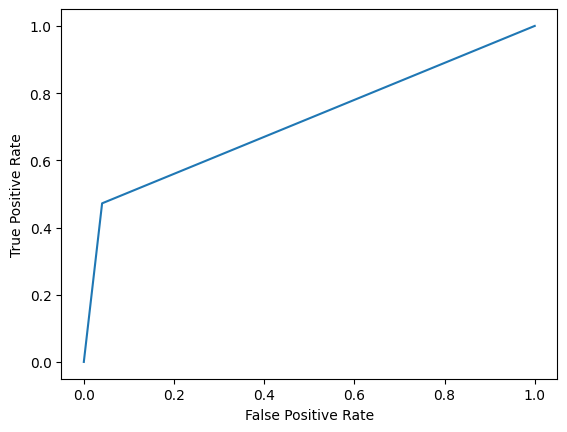

In [79]:
#define metrics
pred_rf = rr.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,pred_rf)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

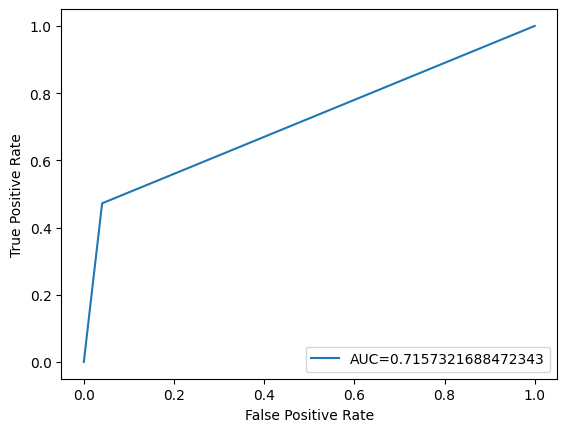

In [80]:
#define metrics
pred_rf = rr.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,pred_rf)
auc = metrics.roc_auc_score(y_test,pred_rf)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [81]:
print(metrics.accuracy_score(y_test, pred_rf))
matrix = confusion_matrix(y_test, pred_rf)
print(matrix)

0.8515155847869602
[[31347  1325]
 [ 4906  4386]]


<Axes: >

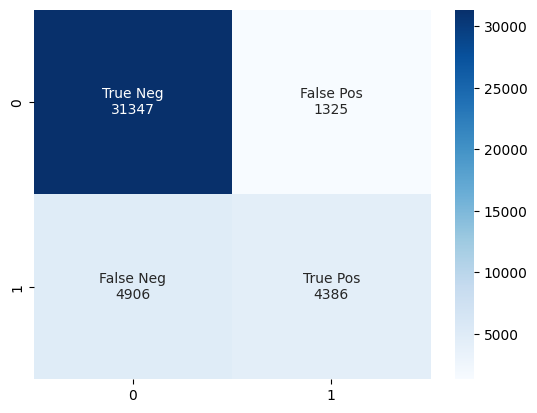

In [82]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

In [83]:
print(classification_report(y_test, pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     32672
           1       0.77      0.47      0.58      9292

    accuracy                           0.85     41964
   macro avg       0.82      0.72      0.75     41964
weighted avg       0.84      0.85      0.84     41964



Untuk algoritma Random Forest dihasilkan AUC sebesar 0.71 serta nilai akurasi sebesar 0.85.

### **Naive Bayes**

In [84]:
gb = GaussianNB()
gb.fit(X_train, y_train)

GaussianNB()

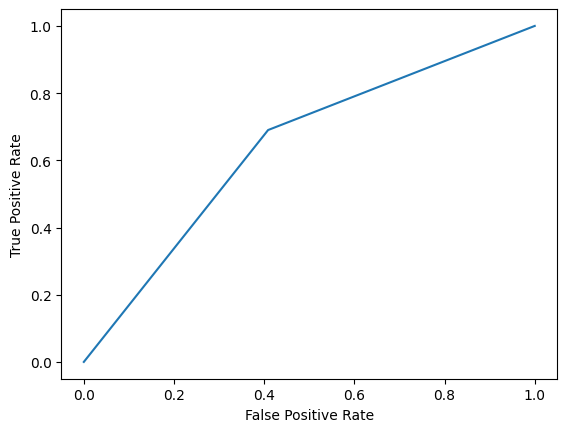

In [85]:
#define metrics
pred_gb = gb.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,pred_gb)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

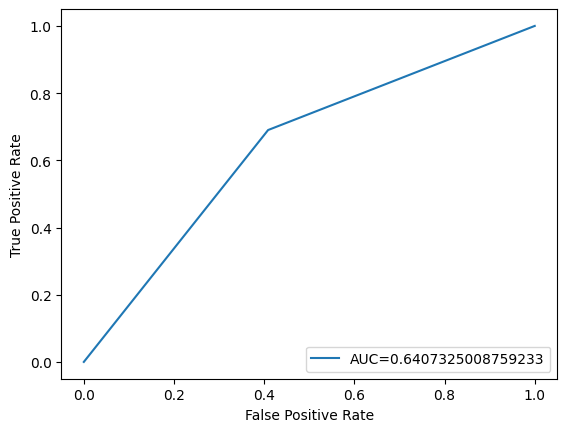

In [86]:
#define metrics
pred_gb = gb.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,pred_gb)
auc = metrics.roc_auc_score(y_test,pred_gb)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [87]:
print(metrics.accuracy_score(y_test, pred_gb))
matrix = confusion_matrix(y_test, pred_gb)
print(matrix)

0.6131922600324087
[[19319 13353]
 [ 2879  6413]]


<Axes: >

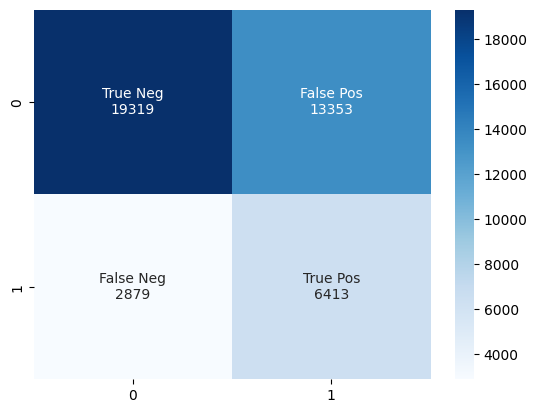

In [88]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

In [89]:
print(classification_report(y_test, pred_gb))

              precision    recall  f1-score   support

           0       0.87      0.59      0.70     32672
           1       0.32      0.69      0.44      9292

    accuracy                           0.61     41964
   macro avg       0.60      0.64      0.57     41964
weighted avg       0.75      0.61      0.65     41964



Untuk algoritma Naive Bayes dihasilkan AUC sebesar 0.64 serta nilai akurasi sebesar 0.61.

### **KNN**

In [90]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

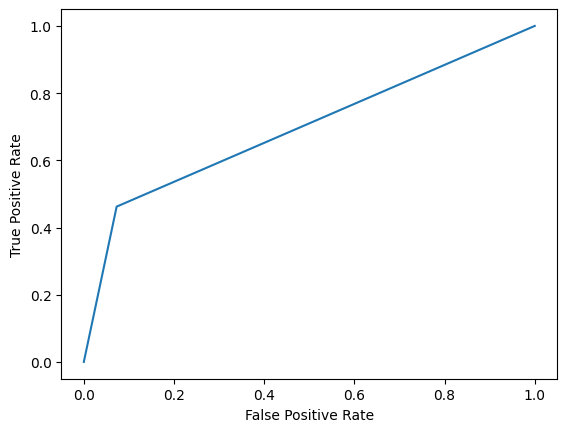

In [91]:
#define metrics
pred_knn = knn.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,pred_knn)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

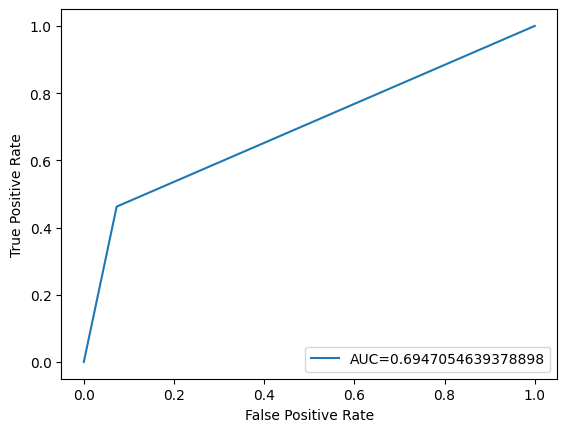

In [92]:
#define metrics
pred_knn = knn.predict(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test,pred_knn)
auc = metrics.roc_auc_score(y_test,pred_knn)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [93]:
print(metrics.accuracy_score(y_test, pred_knn))
matrix = confusion_matrix(y_test, pred_knn)
print(matrix)

0.8242302926317796
[[30293  2379]
 [ 4997  4295]]


<Axes: >

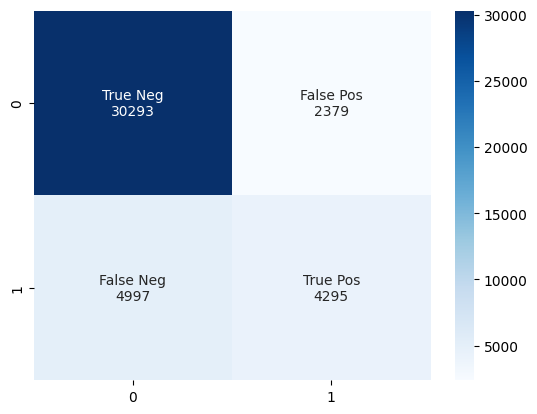

In [94]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                matrix.flatten()]

labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(matrix, annot=labels, fmt='', cmap='Blues')

In [95]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     32672
           1       0.64      0.46      0.54      9292

    accuracy                           0.82     41964
   macro avg       0.75      0.69      0.71     41964
weighted avg       0.81      0.82      0.81     41964



Untuk algoritma KNN dihasilkan AUC sebesar 0.69 serta nilai akurasi sebesar 0.81

<br>

## **Kesimpulan**

Dari beberapa percobaan yang dilakukan pada tiap-tiap jenis algoritma, model yang terbaik dihasilkan ketika memiliki nilai AUC yang mendekati 1, hal ini dikarenakan semakin besar nilai AUC (rentang 0-1) maka akan semakin baik model tersebut dalam membedakan 2 kelas, hal ini juga didukung dengan bentuk kurva ROC yang semakin dekat dengan pojok kiri atas maka akan semakin baik (karena nilai TPR > FPR), serta nilai akurasi yang mendekati 1.

Berdasarkan kriteria penilaian diatas, model yang paling bagus ialah Random Forest karena memiliki nilai akurasi dan AUC yang tinggi yaitu sebesar 0.71 dan 0.85. Hal ini juga didukung dari segi bentu kurva ROC yang memiliki kecondongan paling besar ke kiri dibandingkan jenis algoritma yang lain.